In [51]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [52]:
# Step 1: Load Dataset
url = "C:\\Users\\Ali\\Desktop\\marketing_campaign.csv"
df = pd.read_csv(url, sep="\t")
print("Initial dataset shape:", df.shape)


Initial dataset shape: (2240, 29)


In [53]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [54]:
# Step 2: Check for Missing Values
print("\nChecking for missing values before cleaning:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])



Checking for missing values before cleaning:
Income    24
dtype: int64


In [55]:
# Step 3: Handle Missing Values
# Here we choose to drop rows with missing values for simplicity, but other methods can be applied
df_clean = df.dropna()
print("\nAfter dropping missing values:")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0])



After dropping missing values:
Series([], dtype: int64)


In [56]:
missing_after = df_clean.isnull().sum()

In [57]:
missing_after

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [58]:
print("New dataset shape:", df_clean.shape)

New dataset shape: (2216, 29)


In [59]:
# Step 4: Check for Duplicate Rows
duplicate_count = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows before dropping: {duplicate_count}")



Number of duplicate rows before dropping: 0


In [60]:
# Step 5: Remove Duplicate Rows
if duplicate_count > 0:
    df_clean = df_clean.drop_duplicates()
    print("Duplicates dropped.")
else:
    print("No duplicates found.")

duplicate_count_after = df_clean.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicate_count_after}")
print("Dataset shape after duplicate removal:", df_clean.shape)


No duplicates found.
Number of duplicate rows after dropping: 0
Dataset shape after duplicate removal: (2216, 29)



Generating boxplots to visualize outliers for numerical columns:


D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


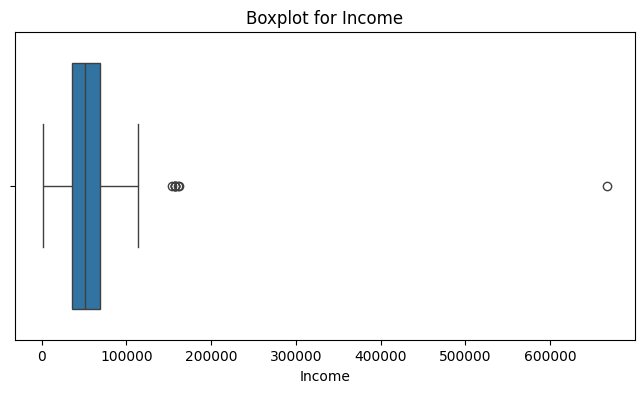

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


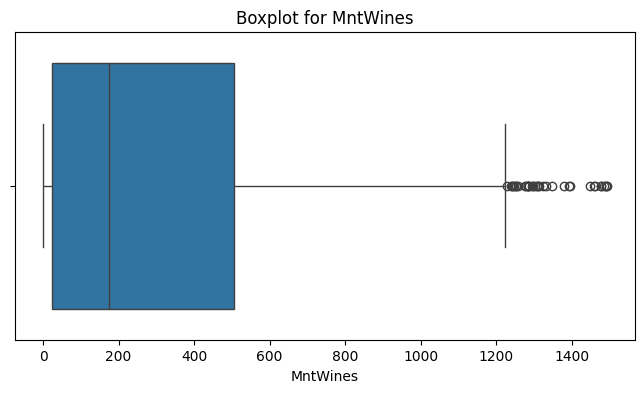

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


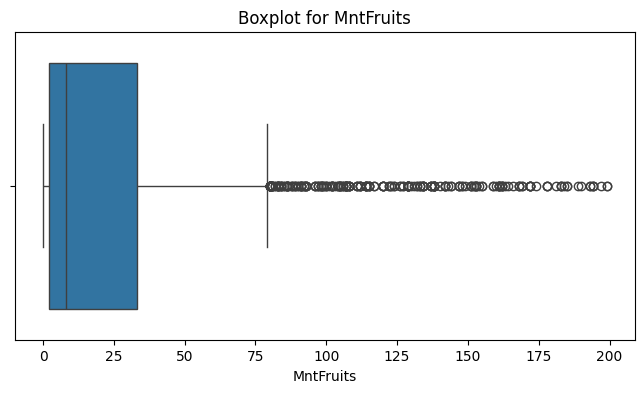

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


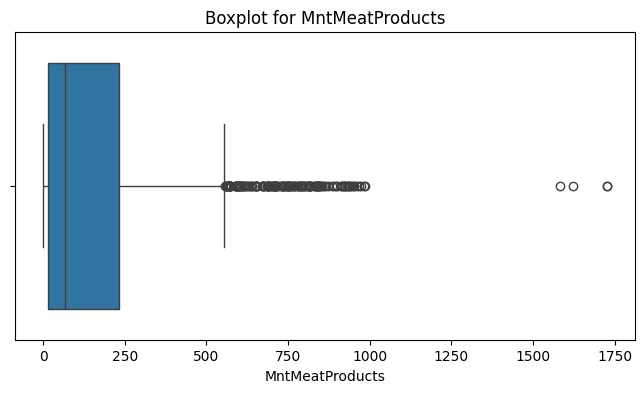

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


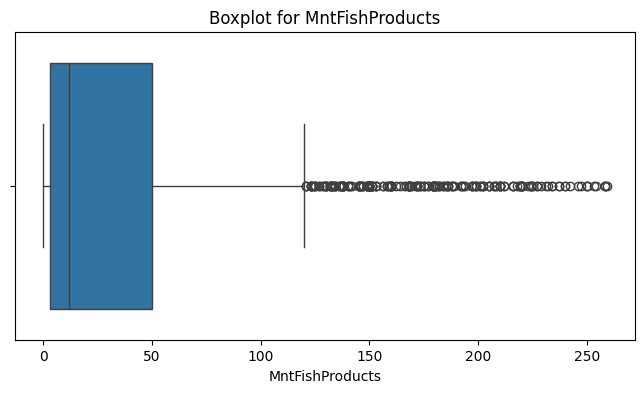

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


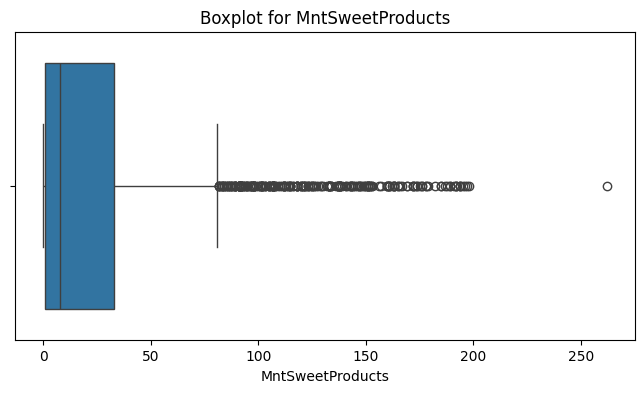

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


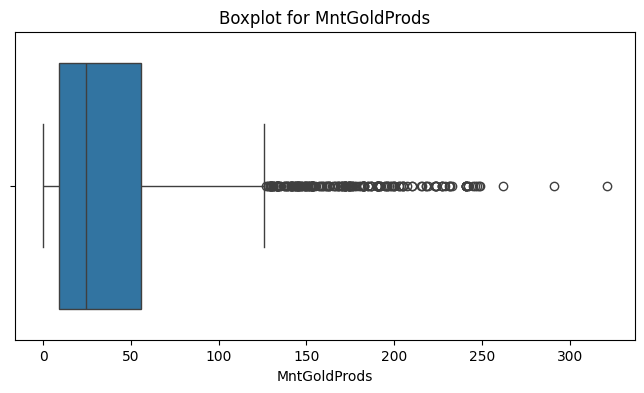

In [61]:
# Step 6: Detect Outliers Using Boxplots
num_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

print("\nGenerating boxplots to visualize outliers for numerical columns:")
for col in num_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


Removed 8 outliers from Income
Removed 34 outliers from MntWines
Removed 242 outliers from MntFruits
Removed 225 outliers from MntMeatProducts
Removed 214 outliers from MntFishProducts
Removed 114 outliers from MntSweetProducts
Removed 128 outliers from MntGoldProds
Shape after removing outliers: (1251, 29)

Generating boxplots after outlier removal:


D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


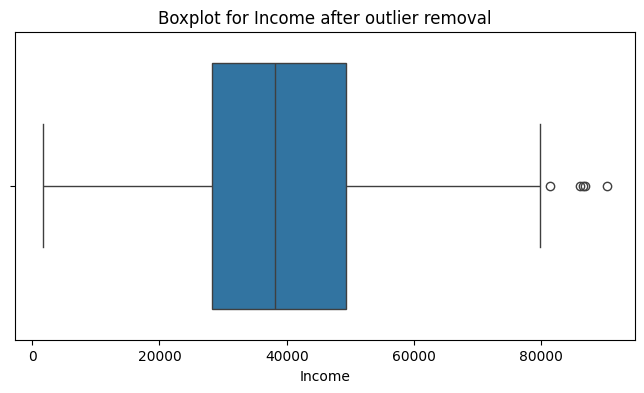

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


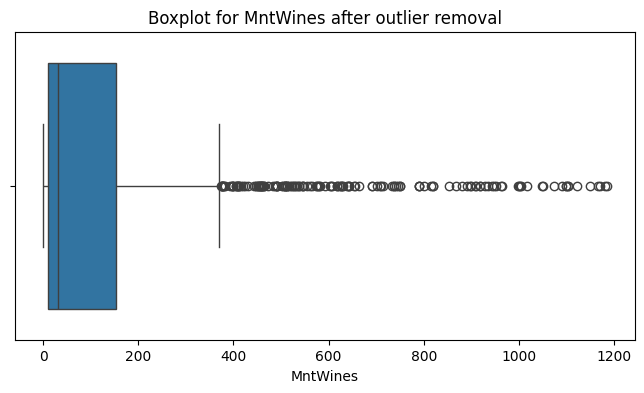

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


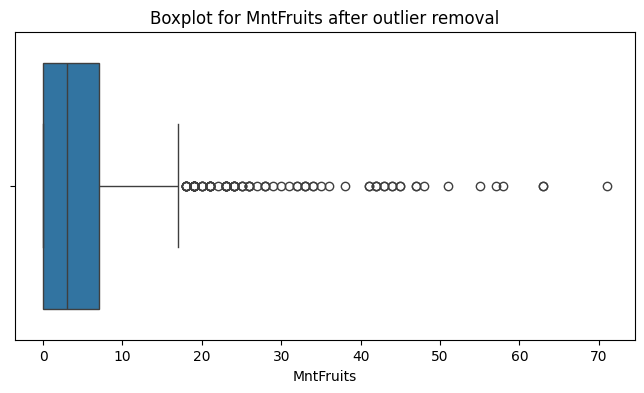

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


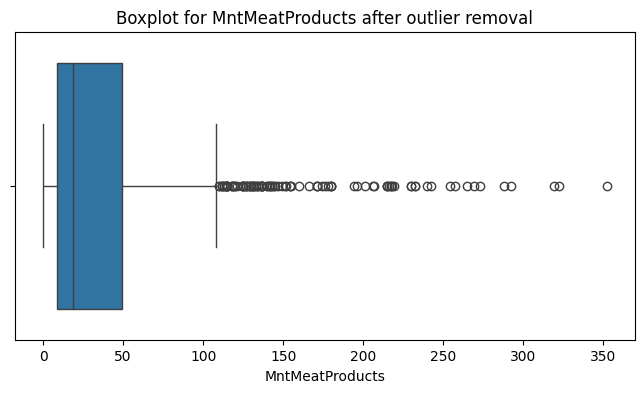

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


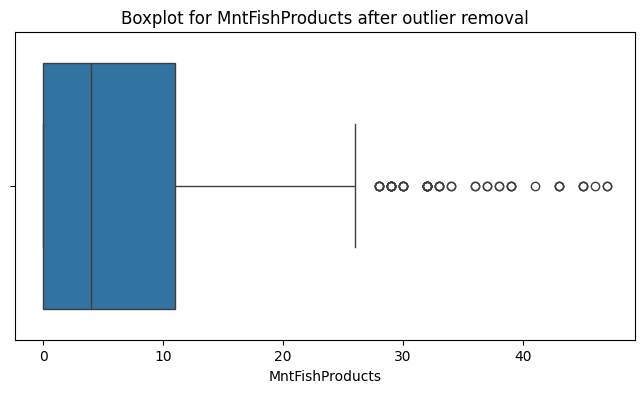

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


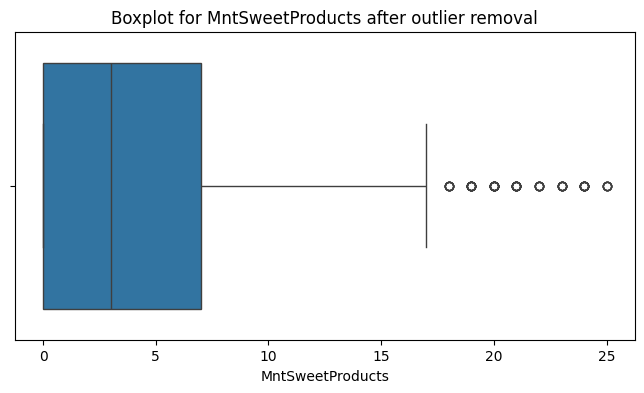

D:\Users\Ali\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


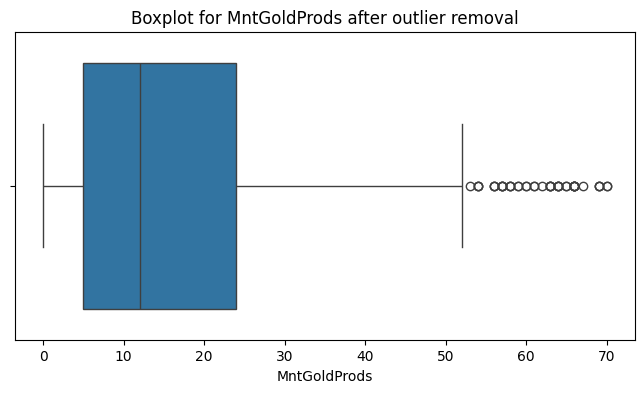

In [62]:
# Step 7: Remove Outliers Using IQR Method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_count = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after_count = df_filtered.shape[0]
    print(f"Removed {before_count - after_count} outliers from {column}")
    return df_filtered

df_no_outliers = df_clean.copy()
for col in num_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

print("Shape after removing outliers:", df_no_outliers.shape)

print("\nGenerating boxplots after outlier removal:")
for col in num_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot for {col} after outlier removal')
    plt.show()


In [63]:
# Step 8: Fix Data Types and Format Columns

# Convert 'Dt_Customer' to datetime
df_no_outliers['Dt_Customer'] = pd.to_datetime(df_no_outliers['Dt_Customer'], errors='coerce')


In [64]:
df_no_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,NaT,68,28,...,20,1,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,NaT,50,5,...,4,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-01-07,81,3,...,7,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,NaT,91,908,...,6,0,1,0,0,0,0,3,11,0


In [65]:
# Add fake email column for demonstration
# Generate some emails with valid and invalid formats randomly
np.random.seed(42)
def generate_email(idx):
    valid = np.random.choice([True, False], p=[0.8, 0.2])
    if valid:
        return f"user{idx}@example.com"
    else:
        # invalid emails (missing '@' or domain)
        invalid_emails = ["userexample.com", "user@.com", "user@domain", "user@domain."]
        return np.random.choice(invalid_emails)

df_no_outliers['E-mail'] = [generate_email(i) for i in range(len(df_no_outliers))]

print("\nSample emails:")
print(df_no_outliers['E-mail'].head(10))



Sample emails:
1     user0@example.com
3           user@domain
7     user2@example.com
8     user3@example.com
9     user4@example.com
11    user5@example.com
13    user6@example.com
14    user7@example.com
16    user8@example.com
19    user9@example.com
Name: E-mail, dtype: object


In [66]:
df_no_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,E-mail
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,user0@example.com
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,user@domain
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,user2@example.com
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,user3@example.com
9,5899,1950,PhD,Together,5648.0,1,1,NaT,68,28,...,1,0,0,0,0,0,3,11,0,user4@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,NaT,50,5,...,0,0,0,0,0,0,3,11,0,user1246@example.com
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-01-07,81,3,...,0,0,0,0,0,0,3,11,0,user@domain
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,user1248@example.com
2237,7270,1981,Graduation,Divorced,56981.0,0,0,NaT,91,908,...,0,1,0,0,0,0,3,11,0,user1249@example.com


In [67]:
# Step 9: Email validation and cleaning

def is_valid_email(email):
    if pd.isnull(email):
        return False
    pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    return bool(re.match(pattern, email))

df_no_outliers['Email_Valid'] = df_no_outliers['E-mail'].apply(is_valid_email)

invalid_emails = df_no_outliers[~df_no_outliers['Email_Valid']]
print(f"\nNumber of invalid emails: {invalid_emails.shape[0]}")

if invalid_emails.shape[0] > 0:
    print("Sample invalid emails:")
    print(invalid_emails[['E-mail']].head())

# Remove invalid email rows
df_no_outliers = df_no_outliers[df_no_outliers['Email_Valid']].copy()
df_no_outliers.drop(columns=['Email_Valid'], inplace=True)

print("Shape after removing invalid emails:", df_no_outliers.shape)



Number of invalid emails: 241
Sample invalid emails:
          E-mail
3    user@domain
26     user@.com
66  user@domain.
82   user@domain
85  user@domain.
Shape after removing invalid emails: (1010, 30)


In [68]:
# Step 10: Standardize text columns

df_no_outliers['Education'] = df_no_outliers['Education'].str.lower().str.strip()
df_no_outliers['Marital_Status'] = df_no_outliers['Marital_Status'].str.lower().str.strip()


In [69]:
# Step 11: Final overview and save cleaned dataset

print("\nFinal cleaned dataset info:")
print(df_no_outliers.info())

df_no_outliers.to_csv("C:\\Users\\Ali\\Desktop\\customer_personality_cleaned_with_email.csv", index=False)
print("\nCleaned dataset saved as 'customer_personality_cleaned_with_email.csv'")


Final cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 1 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1010 non-null   int64         
 1   Year_Birth           1010 non-null   int64         
 2   Education            1010 non-null   object        
 3   Marital_Status       1010 non-null   object        
 4   Income               1010 non-null   float64       
 5   Kidhome              1010 non-null   int64         
 6   Teenhome             1010 non-null   int64         
 7   Dt_Customer          399 non-null    datetime64[ns]
 8   Recency              1010 non-null   int64         
 9   MntWines             1010 non-null   int64         
 10  MntFruits            1010 non-null   int64         
 11  MntMeatProducts      1010 non-null   int64         
 12  MntFishProducts      1010 non-null   int64         
 13  MntSweetP